In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



#from mlxtend.regressor import StackingRegressor

from sklearn.externals import joblib

# 1-Target-->Next_Tmax

In [135]:
df=pd.read_csv('E:\\temp_pred.csv')
pd.set_option('display.max_columns',None)

In [136]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [137]:
df.shape

(7752, 25)

# Feature Engineering

# checking for missing values in dataset

In [138]:
df.isnull().sum()#there are missing values in  the dataset
#moreover there are missing values in the target features i.e Next_Tmax & Next_Tmin.

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# Dropping rows where missing values in Next_Tmax & Next_Tmin

In [139]:
df=df.dropna()#Because the targets are having missing values,imputing might bias the model.

In [140]:
df.shape

(7588, 25)

In [141]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [142]:
df.dtypes#we can see 'Date' is in object format,which should actualy be in datetime format.

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# Changing the datatype of 'Date' column

In [143]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [144]:
new_df=pd.DataFrame({'year':df['Date'].dt.year,
                     'month':df['Date'].dt.month,
                     'day':df['Date'].dt.day,
                     
                     
                     'week':df['Date'].dt.week,           
                     
                     
                    'quater':df['Date'].dt.quarter})


In [145]:
df=pd.concat([df,new_df],axis=1)

In [146]:
df=df.drop('Date',axis=1)#As we have extracted all the features from 'time' column we are dropping it.

In [147]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day,week,quater
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30,26,2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30,26,2
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30,26,2
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30,26,2
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30,26,2


# Checking correlation between attributes

In [148]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day,week,quater
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,0.003526,-0.000161,0.005005,-0.001954,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,0.001474,0.003114,-0.000799,0.002108,0.004411
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,-0.216976,-0.146391,-0.143069,-0.114917,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,0.056002,0.147358,-0.151982,0.046625,0.017705
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,0.090038,-0.004719,-0.046694,0.111577,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,0.037457,0.084047,-0.114294,-0.002885,0.070877
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,0.744774,0.688069,0.513937,0.259039,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.002147,-0.190674,-0.060702,-0.220338,0.017552
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,0.390620,0.224734,0.127242,0.268019,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.144286,-0.117317,-0.014242,-0.112242,-0.003947
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,-0.525380,-0.542728,-0.429739,-0.115659,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,0.020308,0.096915,-0.160191,0.001487,0.062751
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,0.046537,-0.044998,-0.079536,0.034956,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.000564,0.023412,-0.171284,-0.083760,0.067063
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,0.257226,0.238155,0.218870,0.141503,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.114114,-0.113617,-0.040088,-0.120691,-0.014389
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,-0.265382,-0.246709,-0.173156,-0.018708,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,0.055898,0.060947,-0.019588,0.043514,-0.006002
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,0.779510,0.516698,0.362670,0.446930,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.066233,-0.212477,-0.024234,-0.212542,0.027468


In [149]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day,week,quater
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,2014.991697,7.465999,15.939510,30.721534,2.984713
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,1.410877,0.528635,8.906521,2.588734,0.122701
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,2013.000000,6.000000,1.000000,26.000000,2.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,2014.000000,7.000000,8.000000,28.000000,3.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,2015.000000,7.000000,16.000000,31.000000,3.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,2016.000000,8.000000,24.000000,33.000000,3.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,2017.000000,8.000000,31.000000,35.000000,3.000000


In [150]:
#outliers are present in some columns as difference between mean value and max value is very high.

# EDA

# Univariate analysis

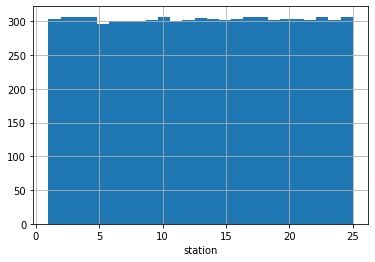

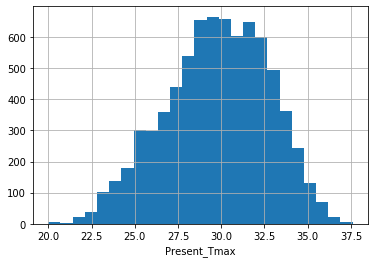

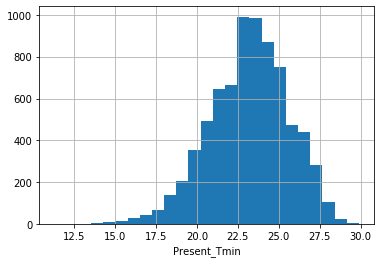

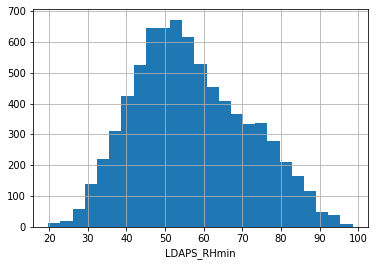

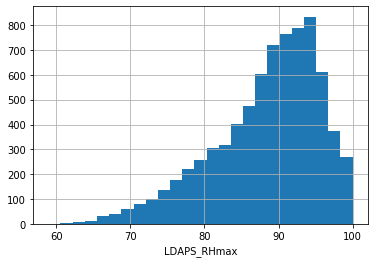

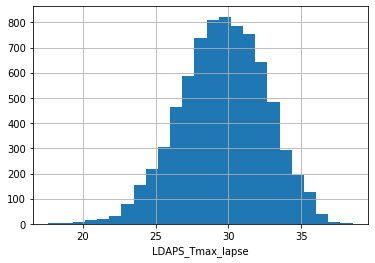

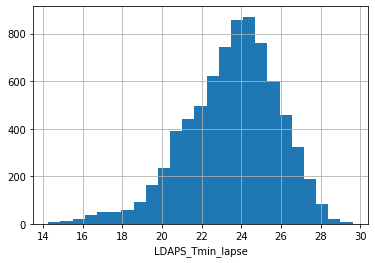

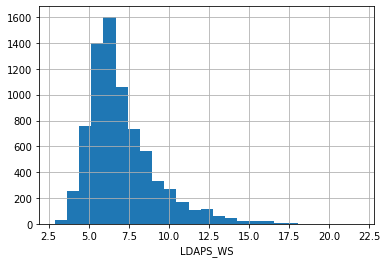

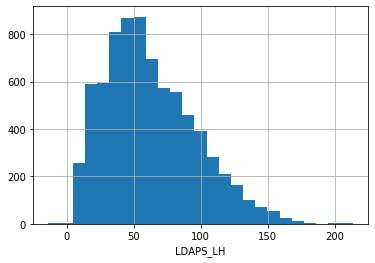

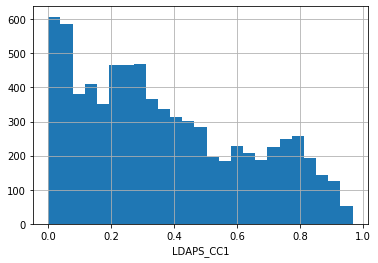

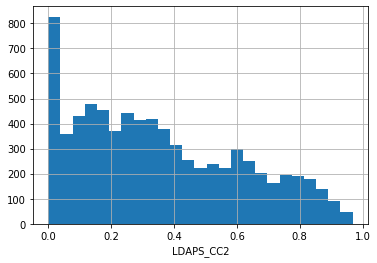

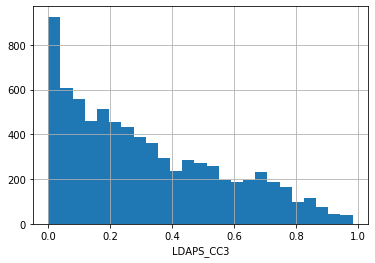

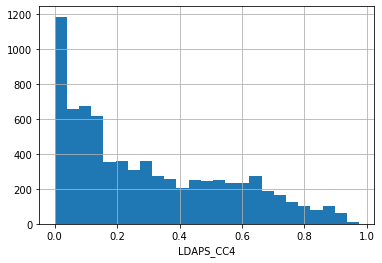

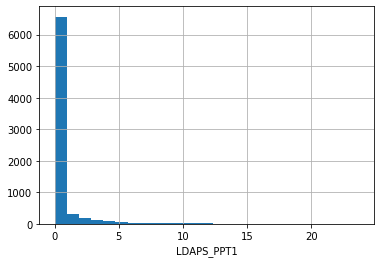

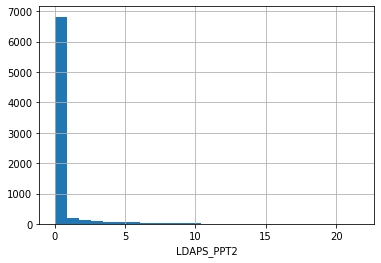

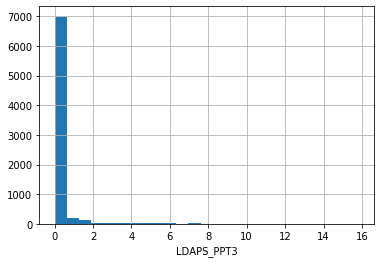

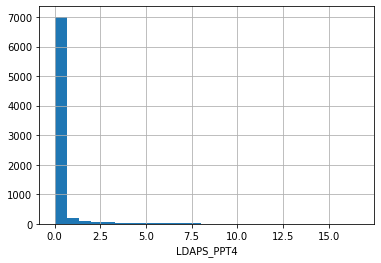

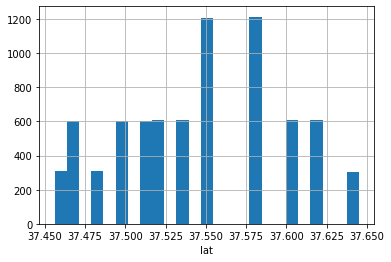

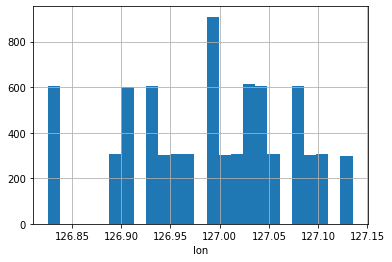

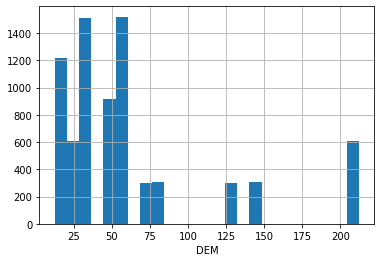

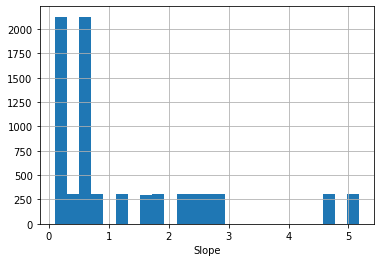

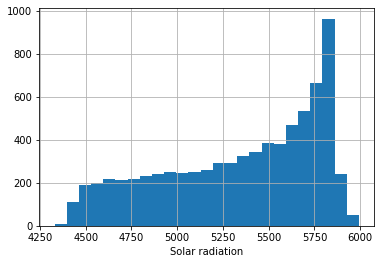

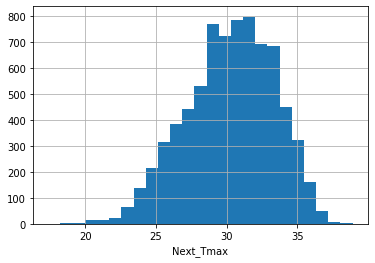

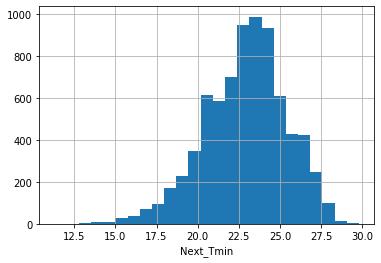

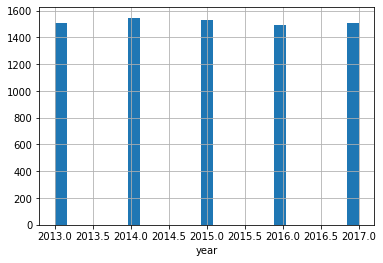

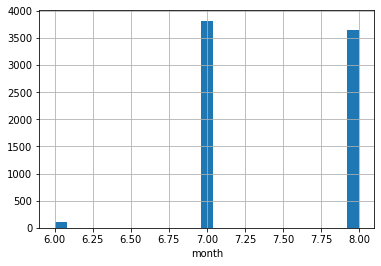

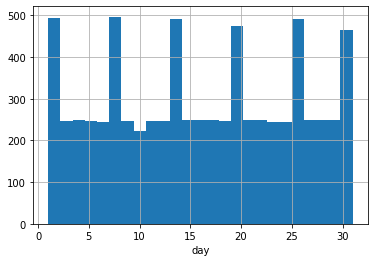

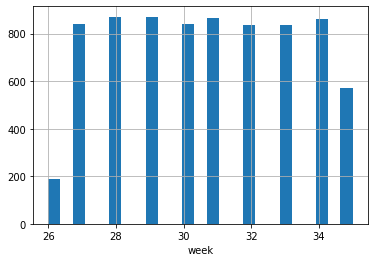

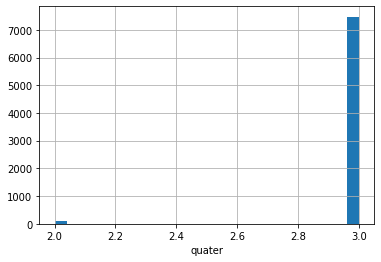

In [71]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

In [72]:
#We can see data is skewed,we need to change it to gaussian distribution before model building.

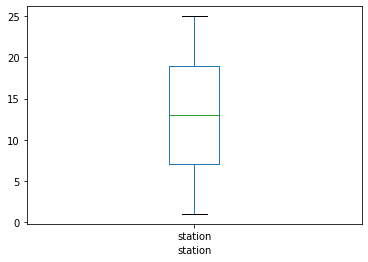

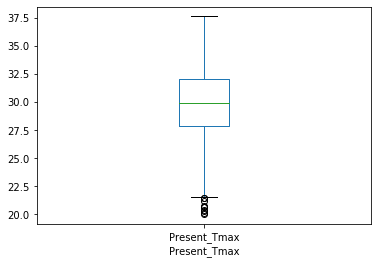

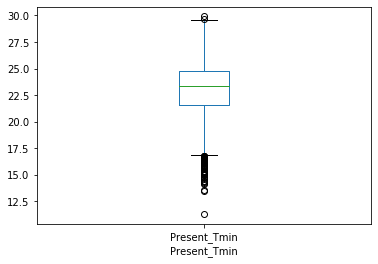

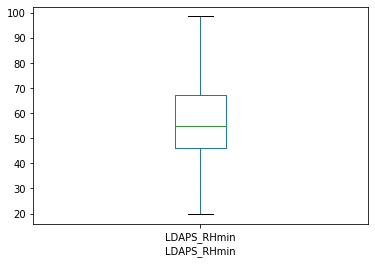

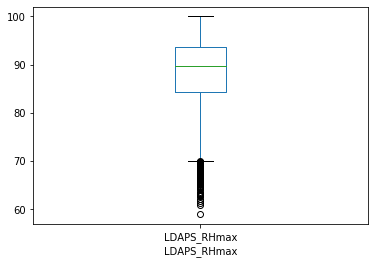

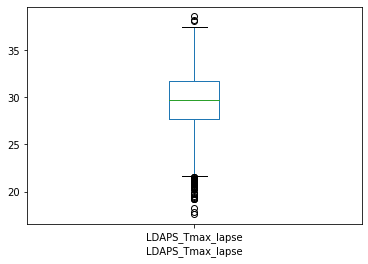

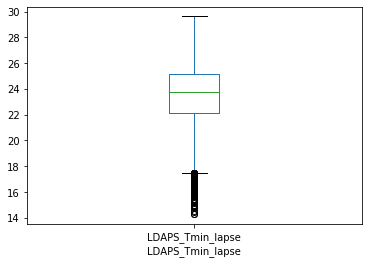

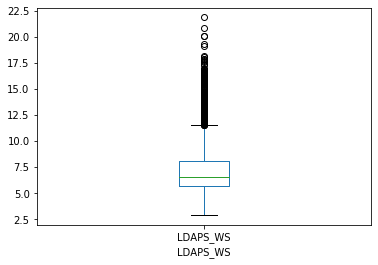

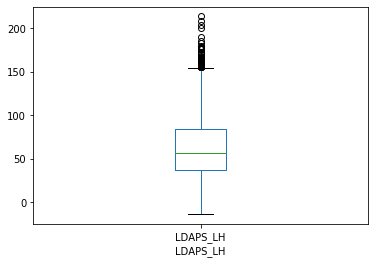

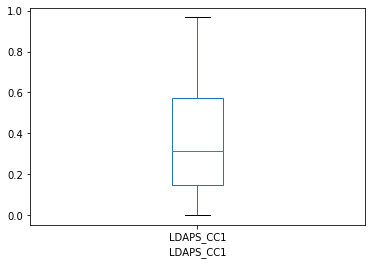

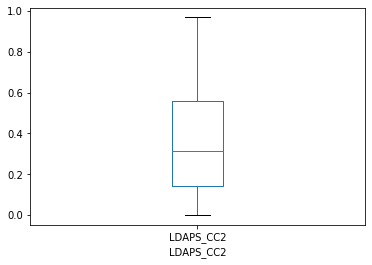

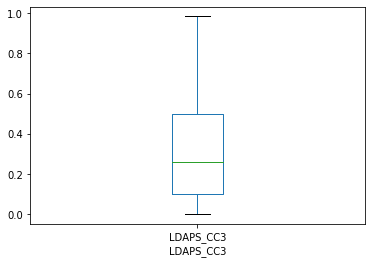

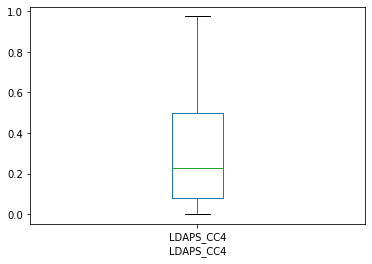

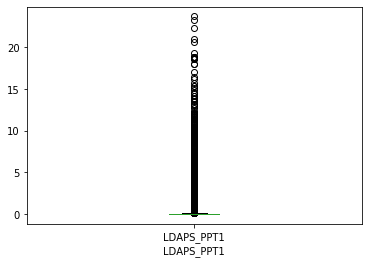

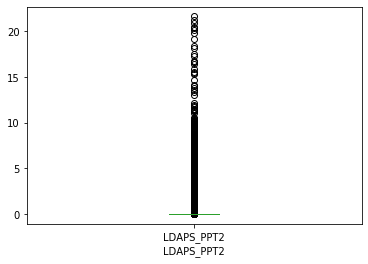

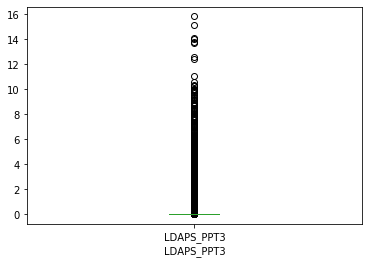

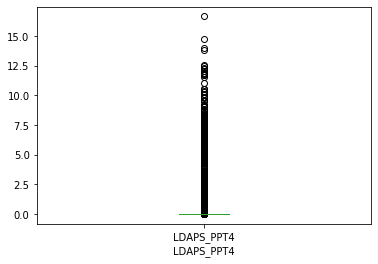

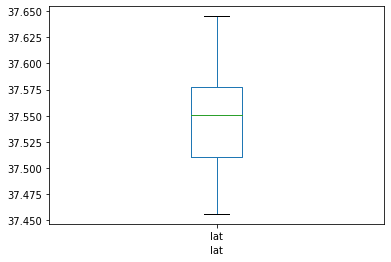

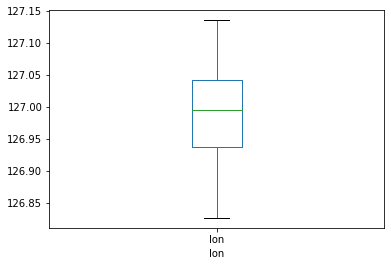

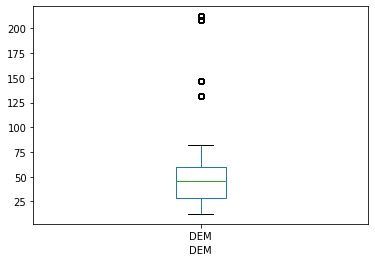

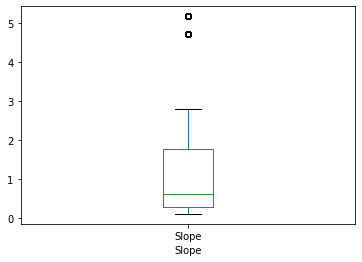

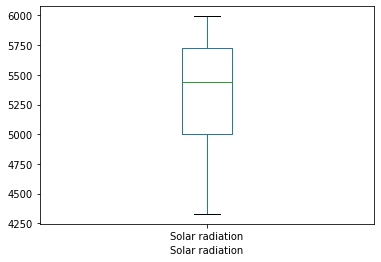

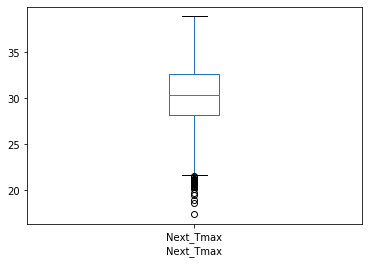

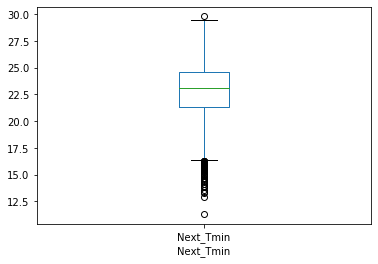

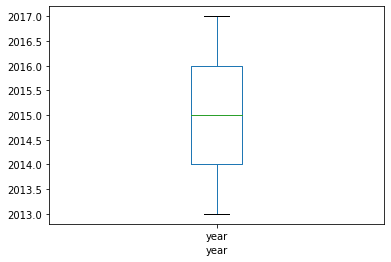

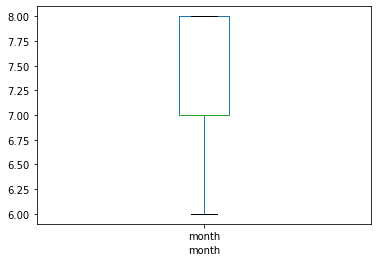

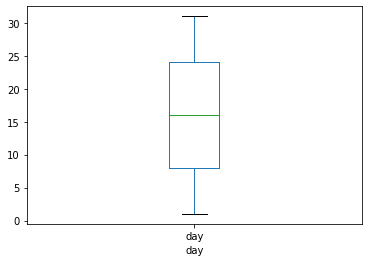

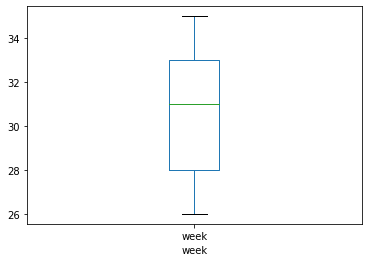

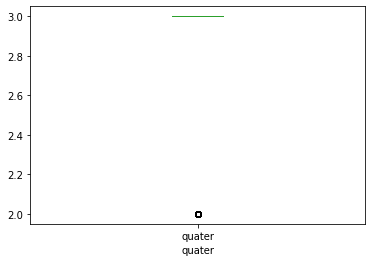

In [73]:
#checking outliers
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Feature Engineering part-2

# Saving data for next regression problem where target is Next_Tmin

In [151]:
df.to_csv('E:\\cleanedtemperature.csv',index=False)

# Removing unnecessary columns

In [74]:
df=df.drop(['Next_Tmin','quater'],axis=1)# 'Next_Tmin' is dependent on current target 'Next_Tmax',so dropping it.

# Outlier removal

In [77]:
#Removing outliers first
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(7588, 28)

In [78]:
df=df[(z<3).all(axis=1)]
df.shape

(6662, 28)

# Separating training and testing set

In [79]:
#Separating the training and testing set
y=df[['Next_Tmax']]
X=df.drop(['Next_Tmax'],axis=1)

In [80]:
df.skew()

station            -0.002966
Present_Tmax       -0.270414
Present_Tmin       -0.239542
LDAPS_RHmin         0.298631
LDAPS_RHmax        -0.685294
LDAPS_Tmax_lapse   -0.111451
LDAPS_Tmin_lapse   -0.405846
LDAPS_WS            1.083359
LDAPS_LH            0.568197
LDAPS_CC1           0.591147
LDAPS_CC2           0.492065
LDAPS_CC3           0.696229
LDAPS_CC4           0.693809
LDAPS_PPT1          3.700243
LDAPS_PPT2          4.824842
LDAPS_PPT3          5.482891
LDAPS_PPT4          5.888075
lat                 0.105452
lon                -0.277518
DEM                 1.763444
Slope               1.590983
Solar radiation    -0.508940
Next_Tmax          -0.264269
year                0.014833
month               0.024625
day                 0.007222
week               -0.001841
quater              0.000000
dtype: float64

# Skewness removal by power transformation technique

In [81]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') # initally write code like this so you remember
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [82]:
df.skew()

station            -0.203762
Present_Tmax       -0.034562
Present_Tmin       -0.023272
LDAPS_RHmin        -0.015352
LDAPS_RHmax        -0.103907
LDAPS_Tmax_lapse   -0.012876
LDAPS_Tmin_lapse   -0.028449
LDAPS_WS            0.007771
LDAPS_LH           -0.030131
LDAPS_CC1           0.064731
LDAPS_CC2           0.047822
LDAPS_CC3           0.093662
LDAPS_CC4           0.137942
LDAPS_PPT1          1.618196
LDAPS_PPT2          1.808969
LDAPS_PPT3          1.982111
LDAPS_PPT4          2.255678
lat                 0.088650
lon                -0.191482
DEM                 0.038713
Slope               0.233718
Solar radiation    -0.168499
year                0.150318
month               0.024625
day                -0.211361
week               -0.023525
quater              0.000000
dtype: float64

# Scaling the data

In [83]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [84]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,year,month,day,week,quater
0,-0.841202,0.203104,0.132778,1.293434,0.766166,-1.263051,-0.505895,3.485238,1.800506,1.046568,1.824884,1.909661,1.227690,0.271305,7.126631,0.248193,1.413926,0.670669,-1.922554,-0.910571,-0.843836,1.210671,-1.428349,-0.987766,-1.668224,-1.5254,0.0
1,-0.702349,0.376384,-0.083139,0.798247,0.611755,-1.091187,-0.493090,3.219017,0.612297,1.051117,1.750864,1.950458,1.270503,2.109904,7.397324,0.178050,5.947391,-1.484477,-1.016847,-0.160156,0.238368,1.245605,-1.428349,-0.987766,-1.668224,-1.5254,0.0
2,-0.424644,0.029823,-0.946807,0.957595,1.019465,-1.640490,-1.008767,3.615701,0.539882,0.869971,1.771514,1.751063,1.470389,1.663315,7.220246,0.252130,6.025953,-1.754120,-0.450780,2.755470,2.910105,1.314868,-1.428349,-0.987766,-1.668224,-1.5254,0.0
3,0.408470,-0.004833,-0.817257,1.127950,0.736862,-1.244480,-0.581052,3.151161,0.862487,0.905936,1.855487,1.640309,1.410401,1.445583,7.340573,0.315693,7.082032,-1.484477,0.052390,0.396342,0.751979,1.239003,-1.428349,-0.987766,-1.668224,-1.5254,0.0
4,0.686175,0.549664,0.391879,1.084312,0.566374,-1.136914,-0.486693,2.642962,0.798383,0.795531,2.079934,1.798569,1.283845,1.184137,7.347401,0.366836,7.630558,-1.214834,0.417189,-0.086759,-0.006688,1.247839,-1.428349,-0.987766,-1.668224,-1.5254,0.0


# Model building

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [86]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [87]:
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [88]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [89]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    
    
    
    
   
    

***************** KNeighborsRegressor *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.8615364782573882


cross_val_score  - 0.46956273298676965


rmse_score  - 1.1028262285038883


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - 0.8629758477298911


cross_val_score  - 0.6454031310108395


rmse_score  - 1.097079150586902


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.7448720161507981


cross_val_score  - 0.6430309172434401


rmse_score  - 1.4969884452139082


***************** DecisionTreeRegressor *******************


DecisionTreeRegressor(c

In [90]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsRegressor,86.153648,1.102826,46.956273
1,SVR,86.297585,1.097079,64.540313
2,LinearRegression,74.487202,1.496988,64.303092
3,DecisionTreeRegressor,73.667131,1.520857,39.741910
4,GradientBoostingRegressor,83.209134,1.214440,68.825701
5,AdaBoostRegressor,72.401229,1.556984,64.362656
6,RandomForestRegressor,86.967411,1.069928,63.555498
7,XGBRegressor,91.849635,0.846112,64.638653


In [132]:
#We can see XGBRegressor is performing the best with R2 score=91.84%,but there is a big difference in CVS.
#Hence the model is suffering from over/underfitting condition.

#RMSE score is well within range for this particular problem.

In [134]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state for all models

In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [92]:
print('knn',maxr2_score(knn,x,y))
print('SVR',maxr2_score(svr,x,y))
print('lr',maxr2_score(lr,x,y))
print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

print('ada',maxr2_score(ada,x,y))

max_r2_score is at random_state   85   which is   0.8705759340787782
knn 85
max_r2_score is at random_state   88   which is   0.8790707252806117
SVR 88
max_r2_score is at random_state   92   which is   0.7918753830460397
lr 92
max_r2_score is at random_state   85   which is   0.7968154479750109
dt 85
max_r2_score is at random_state   85   which is   0.8687183878355688
gbm 85
max_r2_score is at random_state   94   which is   0.8927435734674581
rfr 94
max_r2_score is at random_state   85   which is   0.9314167171516897
xgb 85
max_r2_score is at random_state   81   which is   0.7785975449705916
ada 81


# GridsearchCV

# model1->XGBoostRegressor(random_state=85)=93.14

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85)
xgb=XGBRegressor()

In [94]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=gscv.fit(x,y)
grid_search.best_params_

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3}

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85)
xgb=XGBRegressor(max_depth=3,colsample_bytree= 0.7, learning_rate=0.1)
xgb.fit(x,y)
pred_xgb=xgb.predict(x_test)
score=r2_score(y_test,pred_xgb)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_score=   0.8910184801876273
RMSE score=  0.9977742510726116


In [96]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
xgb=XGBRegressor(max_depth=3,colsample_bytree= 0.7, learning_rate=0.1)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.6999237048898411


# model2->RandomForestRegressor(random_state=94)=89.27

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94)
rfr=RandomForestRegressor()

In [98]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfr,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 250}

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98)
rfr=RandomForestRegressor(max_depth=7,min_samples_leaf=1,n_estimators=250)
rfr.fit(x,y)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_score=   0.8630666168910627
RMSE score=  1.0662386531203791


In [100]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
rfr=RandomForestRegressor(max_depth=7,min_samples_leaf=1,n_estimators=250)
cvs=cross_val_score(rfr,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.6591932223092078


# model3->GradientBoostingRegressor(random_state=85)=86.87

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85)
gbm=GradientBoostingRegressor()

In [102]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(gbm,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94)
gbm=GradientBoostingRegressor(max_depth=5,min_samples_leaf=2,n_estimators=100)
gbm.fit(x,y)
pred_gbm=gbm.predict(x_test)
score=r2_score(y_test,pred_gbm)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_gbm)))

R2_score=   0.9498638411614081
RMSE score=  0.6597975064564416


In [105]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
gbm=GradientBoostingRegressor(max_depth=5,min_samples_leaf=2,n_estimators=100)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.6999237048898411


# Saving Final  XGBoostRegressor model

In [107]:
#From all the model tried above XGBoostRegressor model has highest cross_val_score .
#Hence saving the XGBoostRegressor model as our final model
#corresponding random_state=85
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85)
xgb=XGBRegressor(max_depth=3,colsample_bytree= 0.7, learning_rate=0.1)
xgb.fit(x,y)
pred_xgb=xgb.predict(x_test)
score=r2_score(y_test,pred_xgb)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_score=   0.8910184801876273
RMSE score=  0.9977742510726116


In [108]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
xgb=XGBRegressor(max_depth=3,colsample_bytree= 0.7, learning_rate=0.1)
xgb.fit(x,y)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.6999237048898411


In [109]:
from sklearn.externals import joblib
joblib.dump(xgb,'Project17-temperaturepred.obj')

['Project17-temperaturepred.obj']

In [111]:
model=joblib.load('Project17-temperaturepred.obj')

In [112]:
pred=model.predict(x_test)
pred

array([27.134705, 26.38726 , 33.280365, ..., 33.9052  , 28.90419 ,
       27.94016 ], dtype=float32)

# Saving final predictions in file.csv

In [113]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['Next_Tmax'])

In [114]:
final_predictions.to_csv('E:\\final_temperaturepred.csv',index=False)

# Conclusion:-

# 2-Target-->Next_Tmin

# Loading the partial cleaned dataset from above

In [152]:
df=pd.read_csv('E://cleanedtemperature.csv')

In [153]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day,week,quater
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30,26,2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30,26,2
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30,26,2
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30,26,2
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30,26,2


# Removing unnecessary columns

In [155]:
df=df.drop(['Next_Tmax','quater'],axis=1)# 'Next_Tmax' is dependent on current target 'Next_Tmax',so dropping it.

# Outlier removal

In [156]:
#Removing outliers first
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(7588, 27)

In [157]:
df=df[(z<3).all(axis=1)]
df.shape

(6740, 27)

# Separating training and testing set

In [158]:
#Separating the training and testing set
y=df[['Next_Tmin']]
X=df.drop(['Next_Tmin'],axis=1)

# Skewness removal by power transformation technique

In [159]:
df.skew()

station            -0.001543
Present_Tmax       -0.269789
Present_Tmin       -0.223716
LDAPS_RHmin         0.309325
LDAPS_RHmax        -0.686302
LDAPS_Tmax_lapse   -0.111772
LDAPS_Tmin_lapse   -0.381626
LDAPS_WS            1.085261
LDAPS_LH            0.566643
LDAPS_CC1           0.594402
LDAPS_CC2           0.505657
LDAPS_CC3           0.701106
LDAPS_CC4           0.708292
LDAPS_PPT1          3.724899
LDAPS_PPT2          4.855364
LDAPS_PPT3          5.513417
LDAPS_PPT4          5.923879
lat                 0.106680
lon                -0.277569
DEM                 1.763785
Slope               1.589498
Solar radiation    -0.519779
Next_Tmin          -0.237274
year                0.024798
month              -0.168843
day                -0.000209
week                0.000336
dtype: float64

In [160]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') # initally write code like this so you remember
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [161]:
df.skew()

station            -0.203588
Present_Tmax       -0.033220
Present_Tmin       -0.022244
LDAPS_RHmin        -0.014108
LDAPS_RHmax        -0.103331
LDAPS_Tmax_lapse   -0.012857
LDAPS_Tmin_lapse   -0.027791
LDAPS_WS            0.007668
LDAPS_LH           -0.030819
LDAPS_CC1           0.065267
LDAPS_CC2           0.049972
LDAPS_CC3           0.094378
LDAPS_CC4           0.142004
LDAPS_PPT1          1.616885
LDAPS_PPT2          1.820422
LDAPS_PPT3          1.994409
LDAPS_PPT4          2.266397
lat                 0.000000
lon                -0.191517
DEM                 0.038877
Slope               0.233729
Solar radiation    -0.172107
year                0.196949
month              -0.087298
day                -0.213956
week               -0.023346
dtype: float64

# Scaling the data

In [162]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)

In [163]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,year,month,day,week
0,-1.672247,-0.425379,-0.813497,0.195832,0.437484,-0.661843,-0.289275,-0.021068,0.224869,-0.440302,-0.526633,-0.568121,-0.614768,-0.341283,-0.277971,-0.259051,-0.237716,1.210944,0.002925,2.826849,1.142958,1.543139,-1.421631,-2.806639,1.58909,-1.879188
1,-1.533506,0.690369,-0.726877,-0.236706,0.364183,-0.016305,0.171731,-0.631629,-0.298942,-0.473856,-0.327639,-0.577883,-0.628396,-0.341283,-0.277971,-0.259051,-0.237716,1.210944,0.518771,-0.304667,-0.536667,1.249602,-1.421631,-2.806639,1.58909,-1.879188
2,-1.394764,0.585768,0.009395,-0.494608,-0.585841,0.071120,0.409672,-0.389824,-1.236974,-0.538125,-0.303955,-0.384400,-0.567095,-0.341283,-0.277971,-0.259051,-0.237716,0.671264,0.845892,-0.518744,-0.720095,1.235929,-1.421631,-2.806639,1.58909,-1.879188
3,-1.256023,0.725237,0.052705,0.194685,1.206445,-0.069377,-0.146121,-0.654296,0.113473,-0.510181,-0.434747,-0.570458,-0.600630,-0.341283,-0.277971,-0.259051,-0.237716,2.018464,0.392955,-0.286847,0.957902,1.220274,-1.421631,-2.806639,1.58909,-1.879188
4,-1.117281,0.516034,-0.596947,0.045578,0.299771,-0.284011,-0.074239,-0.608272,1.376719,-0.768477,-0.335021,-0.493602,-0.448327,-0.341283,-0.277971,-0.259051,-0.237716,0.133584,1.814676,-0.486392,-0.543027,1.226420,-1.421631,-2.806639,1.58909,-1.879188


# Model building

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [ ]:
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [164]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    

***************** KNeighborsRegressor *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.8705759340787782


cross_val_score  - 0.5543453470457657


rmse_score  - 1.0873350353003421


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - 0.8781670846948668


cross_val_score  - 0.7222764248653304


rmse_score  - 1.0549653129542207


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.782367024970422


cross_val_score  - 0.7738888323836675


rmse_score  - 1.4099970745019674


***************** DecisionTreeRegressor *******************


DecisionTreeRegressor(cr

In [165]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsRegressor,87.057593,1.087335,55.434535
1,SVR,87.816708,1.054965,72.227642
2,LinearRegression,78.236702,1.409997,77.388883
3,DecisionTreeRegressor,78.949960,1.386699,58.770594
4,GradientBoostingRegressor,86.855856,1.095777,79.046761
5,AdaBoostRegressor,78.643519,1.396757,73.677239
6,RandomForestRegressor,89.060940,0.999645,75.841386
7,XGBRegressor,93.141672,0.791526,75.112101


In [ ]:
#We can see XGBRegressor is performing the best with R2 score=93.14%.but cvs of GradientBoostingRegressor is high.


#RMSE score is well within range for this particular problem.

In [ ]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state for all models

In [166]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [167]:
print('knn',maxr2_score(knn,x,y))
print('SVR',maxr2_score(svr,x,y))
print('lr',maxr2_score(lr,x,y))
print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

print('ada',maxr2_score(ada,x,y))

max_r2_score is at random_state   84   which is   0.8771112736682447
knn 84
max_r2_score is at random_state   84   which is   0.914587356223819
SVR 84
max_r2_score is at random_state   70   which is   0.8383393811369181
lr 70
max_r2_score is at random_state   46   which is   0.7960416678567811
dt 46
max_r2_score is at random_state   82   which is   0.927727876744044
gbm 82
max_r2_score is at random_state   92   which is   0.8202816914009352
rfr 92
max_r2_score is at random_state   92   which is   0.8953391570105449
xgb 92
max_r2_score is at random_state   77   which is   0.8191382721821445
ada 77


# GridsearchCV

# model1->GradientBoostingRegressor(random_state=82)=92.77

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=82)
gbm=GradientBoostingRegressor()

In [169]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(gbm,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 100}

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94)
gbm=GradientBoostingRegressor(max_depth=7,min_samples_leaf=1,n_estimators=100)
gbm.fit(x,y)
pred_gbm=gbm.predict(x_test)
score=r2_score(y_test,pred_gbm)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_gbm)))

R2_score=   0.9868478322723024
RMSE score=  0.2743146197692557


In [171]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
gbm=GradientBoostingRegressor(max_depth=7,min_samples_leaf=1,n_estimators=100)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.7910503841505312


# model2->XGBoostRegressor(random_state=92)=89.53

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=92)
xgb=XGBRegressor()

In [173]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]           
gscv=GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=gscv.fit(x,y)
grid_search.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3}

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85)
xgb=XGBRegressor(max_depth=3,colsample_bytree= 0.5, learning_rate=0.1)
xgb.fit(x,y)
pred_xgb=xgb.predict(x_test)
score=r2_score(y_test,pred_xgb)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_score=   0.9014628059656773
RMSE score=  0.7374942837942723


In [175]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
xgb=XGBRegressor(max_depth=3,colsample_bytree= 0.5, learning_rate=0.1)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.7936645645470394


# model3->RandomForestRegressor(random_state=92)=82.02

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=92)
rfr=RandomForestRegressor()

In [177]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfr,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 500}

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98)
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=1,n_estimators=500)
rfr.fit(x,y)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_score=   0.9515563087364695
RMSE score=  0.5200303079963876


In [179]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=1,n_estimators=500)
cvs=cross_val_score(rfr,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.7780147652933146


# Saving Final XGBoostRegressor model

In [182]:
#From all the model tried above XGBoostRegressor model has highest cross_val_score .
#Hence saving the XGBoostRegressor model as our final model
#corresponding random_state=85
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85)
xgb=XGBRegressor(max_depth=3,colsample_bytree= 0.5, learning_rate=0.1)
xgb.fit(x,y)
pred_xgb=xgb.predict(x_test)
score=r2_score(y_test,pred_xgb)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_score=   0.9014628059656773
RMSE score=  0.7374942837942723


In [183]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
xgb=XGBRegressor(max_depth=3,colsample_bytree= 0.5, learning_rate=0.1)
xgb.fit(x,y)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.7936645645470394


In [184]:
from sklearn.externals import joblib
joblib.dump(xgb,'Project17-temperaturepredTmin.obj')

['Project17-temperaturepredTmin.obj']

In [185]:
model=joblib.load('Project17-temperaturepredTmin.obj')

In [186]:
pred=model.predict(x_test)
pred

array([26.895178, 21.15379 , 24.55167 , ..., 22.516785, 21.936886,
       23.325165], dtype=float32)

# Saving final predictions in file.csv

In [187]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['Next_Tmin'])

In [188]:
final_predictions.to_csv('E:\\final_temperaturepred.csv',index=False)

# Conclusion:-